# 1. Basic MNIST Perceptron

[YouTube Video](https://www.youtube.com/watch?v=CbXj7091OWA&list=PLD80i8An1OEHSai9cf-Ip-QReOVW76PlB&index=4&ab_channel=Weights%26Biases)

## The Perception Algorithm
1. Takes input data (i.e - pixels in an image as a 1d array)
2. Multiplies by weights (i.e - a 1d array of randomly initialised weights)
3. Outputs a single value (the output)

## The Perceptron

In [16]:
# Import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils

import wandb
from wandb.keras import WandbCallback


In [2]:
# logging code
run = wandb.init()
config = run.config


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: samsfgreen. Use `wandb login --relogin` to force relogin


In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_width = X_train.shape[1]
img_height = X_train.shape[2]

print(X_train.shape,img_width,img_height)

(60000, 28, 28) 28 28


In [8]:
# one shot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]

print(y_train.shape,y_test.shape,num_classes, labels)

(60000, 10) (10000, 10) 10 range(0, 10)


## Notes:
### Definitions / Covered:
- **Gradient Descent**: A method of finding the minimum of a function
- **Backpropagation**: A method of finding the gradient of a function
- **Loss** Function: A function that measures the difference between the predicted value and the actual value
  - We're using the mean squared error function "MSE"
- **Learning** Rate: The step size taken when moving towards the minimum of a function
  - The right learning rate is important, too high and you'll overshoot the minimum, too low and you'll take too long to get there
  - Here we're using the 'adam' optimiser which automatically adjusts the learning rate
- **Accuracy**: The percentage of correct predictions
- **Activation** Functions: A function that is applied to the output of a neuron
  - Here we're using the sigmoid function

### Tools
- **Weights and Biases**: A tool for tracking and visualising machine learning experiments
- **Keras**: A high level API for building neural networks

# Building the model

In [13]:
# create model (linear stack of layers)
model = Sequential()

# Flatten the input, and add to the model
model.add(Flatten(input_shape=(img_width, img_height)))

# Add a dense layer with num_classes neurons, and add to the model
model.add(Dense(num_classes, activation="sigmoid"))

# Compile the model
model.compile(loss='mse', optimizer='adam',
              metrics=['accuracy'])


In [10]:
# Fit the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
          callbacks=[WandbCallback(labels=labels, data_type="image")])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
wandb: WARNING The data_type argument of wandb.keras.WandbCallback is deprecated and will be removed in a future release. Please use input_type instead.
wandb: WARNING Setting input_type = data_type.


Epoch 1/10


2023-01-31 16:16:04.681384: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   9/1875 [..............................] - ETA: 12s - loss: 8165.7134 - accuracy: 0.0868   

2023-01-31 16:16:04.940267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 372.0154 - accuracy: 0.1095

2023-01-31 16:16:14.252272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 7ms/step


2023-01-31 16:16:15.420998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 12s 6ms/step - loss: 371.0834 - accuracy: 0.1096 - val_loss: 22.9878 - val_accuracy: 0.1138
Epoch 2/10
2/2 [==============================] - 0s 3ms/step0s - loss: 7.4085 - accuracy: 0.15
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 7.3746 - accuracy: 0.1582 - val_loss: 1.6417 - val_accuracy: 0.2950
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 4.9885 - accuracy: 0.1769 - val_loss: 7.1577 - val_accuracy: 0.1248
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 6.5462 - accuracy: 0.1551 - val_loss: 6.0938 - val_accuracy: 0.1136
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 6.9116 - accuracy: 0.1574 - val_loss: 7.7032 - val_accuracy: 0.1328
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 7.0202 - accuracy: 0.1506 - val_loss: 5.8521 - val_accuracy: 0.1476
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 6.1139 - accuracy: 0.1569 - val_loss: 6.9191 - val_accuracy: 0.1350
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 6.9814 - accuracy: 0.1527 - val_loss: 2.8331 - val_accuracy: 0.2

# Debugging 

- Does changing the number of Epochs change the accuracy?
  - No, the accuracy doesn't change much after the inital 2 epochs
  - 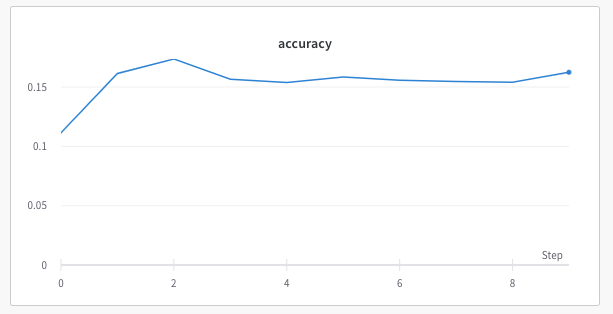
- Does it change with a smaller subset of images?
  - i.e - the first 20 images (not much?)

# Experiment: Test with subset of images
- Accuracy: 0.35 is better than 0.15, because it's overfitting to the first 20 images

In [11]:
# Fit the model (fewer images)
model.fit(X_train[:20, :, :], y_train[:20], epochs=10, validation_data=(X_test, y_test),
          callbacks=[WandbCallback(labels=labels, data_type="image")])

Epoch 1/10


2023-01-31 16:21:25.647026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 8.5120 - accuracy: 0.4000 - val_loss: 8.4952 - val_accuracy: 0.1613
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 7.7750 - accuracy: 0.3000 - val_loss: 8.8912 - val_accuracy: 0.1630
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 2.4699 - accuracy: 0.3500 - val_loss: 13.4071 - val_accuracy: 0.1623
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 5.1161 - accuracy: 0.2000 - val_loss: 10.4378 - val_accuracy: 0.1860
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 3.7001 - accuracy: 0.3000 - val_loss: 10.1699 - val_accuracy: 0.1350
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 4.6578 - accuracy: 0.3000 - val_loss: 11.6228 - val_accuracy: 0.1056
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 5.1162 - accuracy: 0.1500 - val_loss: 11.6293 - val_accuracy: 0.1035
Epoch 8/10
1/1 [==============================]

In [12]:
print(model.predict(X_test[:10, :, :]))

1/1 [==============================] - 0s 17ms/step
[[ 2.7356758   2.979292   -1.2059728   1.9351178   0.16843529  2.23338
   3.5187204  -3.477065   -0.7936001   0.05216171]
 [ 5.1280546   3.05572     2.148266   -0.07108825  1.5342474   5.3271804
   5.721227   -8.347486   -5.7208853   2.0231433 ]
 [ 0.96043944 -0.17473808 -0.3349041   0.41346583  1.1684804  -1.4520338
   0.89313495 -0.1448921  -0.8175715  -0.98033804]
 [ 2.2265787  -0.00999057 -1.1833718   3.2120416  -1.5608323   0.7580197
   1.9693525  -1.0892428  -1.4163203   0.3269245 ]
 [ 0.50949883 -1.9311041   1.3046154  -0.43319622  2.0384398  -0.23658851
   0.3867456   0.02760056  0.8450306  -2.5070944 ]
 [ 1.9296781   0.0577106  -1.3540739   1.5984496   1.5738907  -1.5520787
   0.81917894 -0.4518146  -1.2901573  -1.0956548 ]
 [-1.321011   -2.2049115   3.3337781  -4.5709357   4.1155553  -0.15296635
  -0.4682484   0.16397166  1.612479   -4.78374   ]
 [ 0.75867164 -5.006551   -1.9960364   0.21911436  6.2558765  -5.8929033
   0.56

## Experiment Conclusion:
Weird numbers: these numbers should be between 0 and 1, but they are not. Why?
- softmax or logistic Sigmod function needed! Activation function!
- Sigmoid changes big negative nums to 0, and big positive nums to 1

# Experiment: Added Sigmoid

In [14]:
# Fit the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
          callbacks=[WandbCallback(labels=labels, data_type="image")])

Epoch 1/10
   9/1875 [..............................] - ETA: 12s - loss: 0.3846 - accuracy: 0.0625 

2023-01-31 16:29:32.588853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 0.0867 - accuracy: 0.3007

2023-01-31 16:29:41.502345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step


2023-01-31 16:29:42.644575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0867 - accuracy: 0.3010 - val_loss: 0.0789 - val_accuracy: 0.3468
Epoch 2/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.0780 - accuracy: 0.36
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0780 - accuracy: 0.3636 - val_loss: 0.0756 - val_accuracy: 0.4021
Epoch 3/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.0734 - accuracy: 0.41
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0734 - accuracy: 0.4183 - val_loss: 0.0709 - val_accuracy: 0.4271
Epoch 4/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.0710 - accuracy: 0.43
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0710 - accuracy: 0.4338 - val_loss: 0.0692 - val_accuracy: 0.4431
Epoch 5/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.0703 - accuracy: 0.43
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0703 - accuracy: 0.4385 - val_loss: 0.0692 - val_accuracy: 0.4377
Epoch 6/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.0698 - accuracy: 0.44
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0698 - accuracy: 0.4426 - val_loss: 0.0690 - val_accuracy: 0.4415
Epoch 7/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.0692 - accuracy: 0.44
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 6ms/step - loss: 0.0692 - accuracy: 0.4429 - val_loss: 0.0682 - val_accuracy: 0.4455
Epoch 8/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.0690 - accuracy: 0.44
INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best/assets


wandb: Adding directory to artifact (/Users/samgreen/Development/ml/ml-class/notes/wandb/run-20230131_160445-gyd0ez3h/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 6ms/step - loss: 0.0690 - accuracy: 0.4479 - val_loss: 0.0677 - val_accuracy: 0.4538
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0691 - accuracy: 0.4466 - val_loss: 0.0714 - val_accuracy: 0.4187
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0690 - accuracy: 0.4437 - val_loss: 0.0679 - val_accuracy: 0.4570


In [15]:
print(model.predict(X_test[:10, :, :]))


1/1 [==============================] - 0s 19ms/step
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00

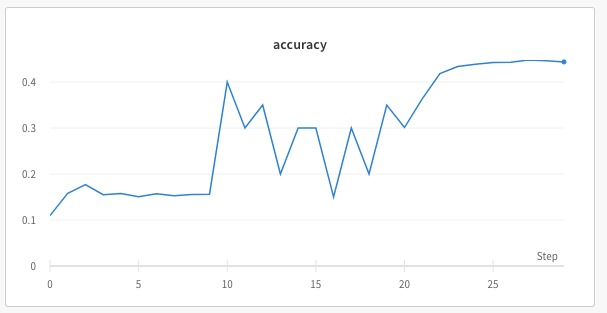
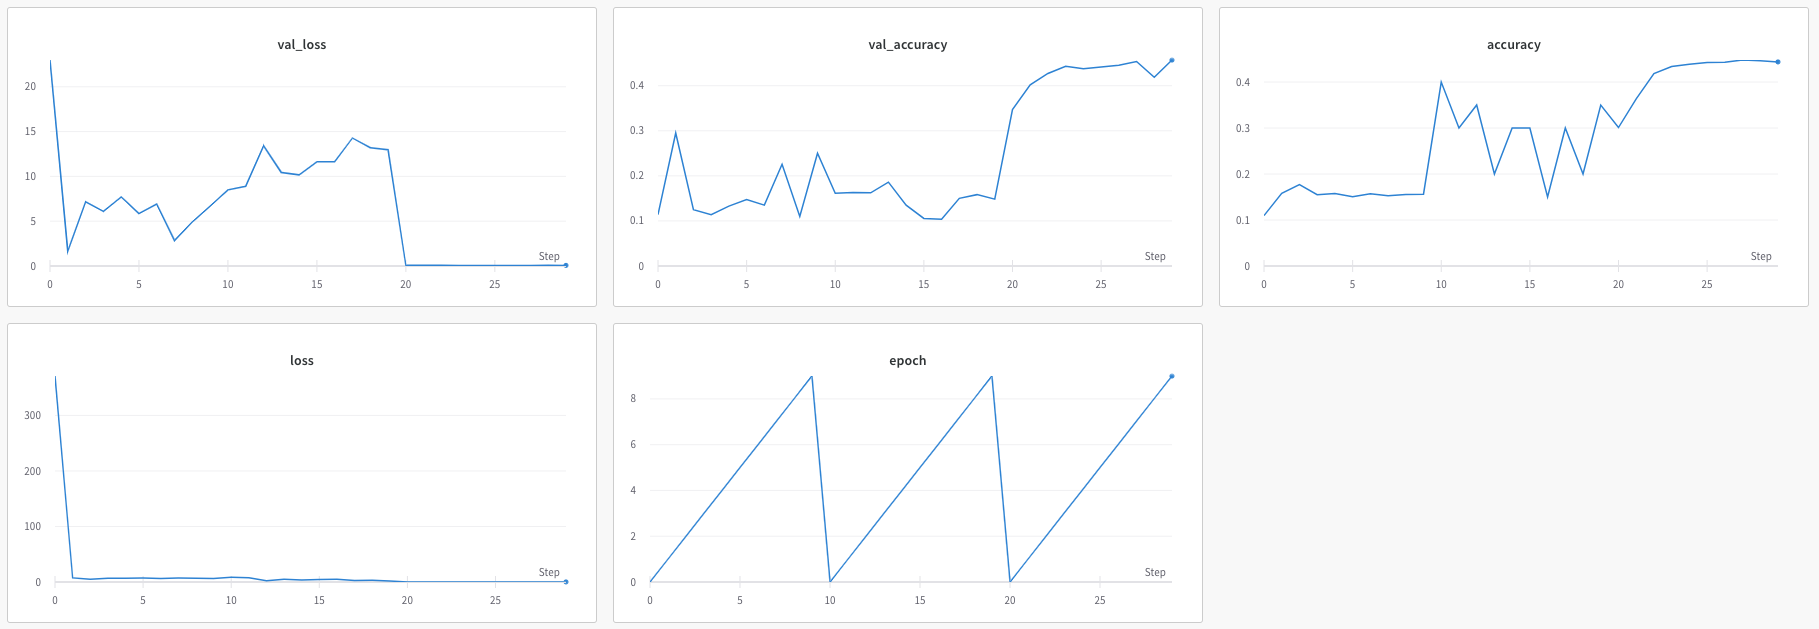

^ The image shows initially the accuracy is ~0.15, then with fewer images the accuracy bounces around a lot as it overfits to the data, then with the sigmoid function the accuracy is much more stable and higher.

Three ways to improve the model:
- Algorithm
- More training data
- Better feature engineering